<a href="https://colab.research.google.com/github/arunt-sjsu/deep_learning/blob/main/Assignment%204%20-%20MNIST%20classifier%20with%20various%20training%20knobs%20with%20numpy%20and%20keras/MNIST_Classifier_Using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from sklearn.metrics import confusion_matrix
import itertools


11493376/11490434 [==============================] - 0s 0us/step


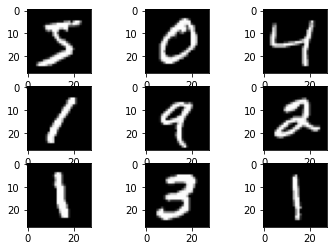

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

for i in range(9):
  pyplot.subplot(330+1+i)
  pyplot.imshow(train_X[i], cmap = pyplot.get_cmap('gray'))

pyplot.show()

In [ ]:
def load_dataset():
  (train_X, train_y), (test_X, test_y) = mnist.load_data()
  train_X = train_X.reshape((train_X.shape[0], 28, 28,1))
  test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))
  train_y = to_categorical(train_y)
  test_y = to_categorical(test_y)
  return train_X, train_y, test_X, test_y

In [ ]:
def prep_pixels(train, test):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  train_norm = train_norm/255.0
  test_norm = test_norm/255.0
  return train_norm, test_norm

In [ ]:
def define_model():
  model = Sequential()
  
  model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  model.add(Dropout(0.25))
  
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  model.add(Dropout(0.25))
  model.add(Flatten())
  
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
def evaluate_model(dataX, dataY, n_folds=5):
  best_model = None
  highest_acc = 0.0
  scores, histories = list(), list()
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  for train_ix, test_ix in kfold.split(dataX):
    model = define_model()
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    history = model.fit(trainX, trainY, epochs = 10, batch_size = 32, validation_data = (testX, testY), verbose=1)
    _, acc = model.evaluate(testX, testY, verbose=0)
    if highest_acc < acc:
      highest_acc = acc
      best_model = model 
    print('> %.3f' % (acc * 100.0))
    scores.append(acc)
    histories.append(history)
  return scores, histories, best_model

In [ ]:
def summarize_diagnostics(histories):
  for i in range(len(histories)):
    pyplot.subplot(2,1,1)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(histories[i].history['loss'], color = 'blue', label = 'train')
    pyplot.plot(histories[i].history['val_loss'], color = 'orange', label = 'test')
    pyplot.subplot(2,1,2)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color = 'blue', label = 'train')
    pyplot.plot(histories[i].history['val_accuracy'], color = 'orange', label = 'test')
  pyplot.show()

In [ ]:
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=pyplot.cm.Blues):
    plot = pyplot
    plot.imshow(cm, interpolation='nearest', cmap=cmap)
    plot.title(title)
    plot.colorbar()
    tick_marks = np.arange(len(classes))
    plot.xticks(tick_marks, classes, rotation=45)
    plot.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plot.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plot.tight_layout()
    plot.ylabel('True label')
    plot.xlabel('Predicted label')

In [ ]:
# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# evaluate model
scores, histories, model = evaluate_model(trainX, trainY)

Epoch 1/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.8795 - accuracy: 0.7103 - val_loss: 0.1265 - val_accuracy: 0.9693
Epoch 2/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.1009 - accuracy: 0.9754 - val_loss: 0.0948 - val_accuracy: 0.9743
Epoch 3/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0532 - accuracy: 0.9871 - val_loss: 0.0835 - val_accuracy: 0.9778
Epoch 4/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0320 - accuracy: 0.9914 - val_loss: 0.0737 - val_accuracy: 0.9812
Epoch 5/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0231 - accuracy: 0.9944 - val_loss: 0.0800 - val_accuracy: 0.9801
Epoch 6/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0115 - accuracy: 0.9974 - val_loss: 0.0771 - val_accuracy: 0.9830
Epoch 7/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0095 - accuracy: 0.9980 - val_loss: 0.0810 -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


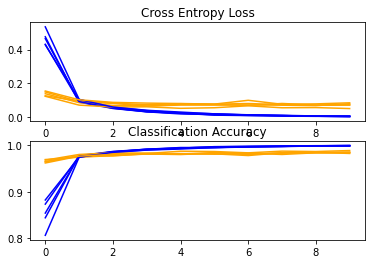

In [ ]:
summarize_diagnostics(histories)
# summarize estimated performance

Accuracy: mean=98.498 std=0.209, n=5


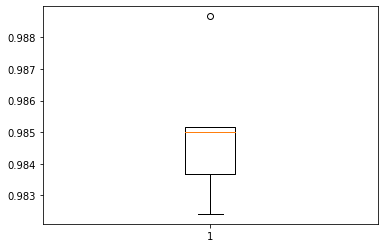

In [ ]:
# learning curves
summarize_performance(scores)

[7 2 1 ... 4 5 6]


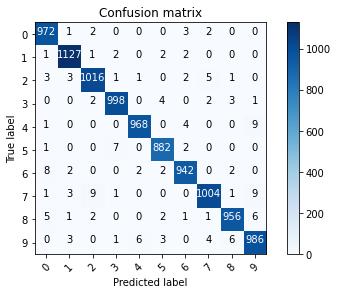

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(testX)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
print(Y_pred_classes)
# Convert validation observations to one hot vectors
Y_true = np.argmax(testY,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 